In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [3]:
def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)
    
    print('Evaluation metrics for ' + regr_type + ' Linear Regression')
    print('explained_variance: ',  round(ev,4)) 
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print()


In [4]:
# Generate synthetic data
noise=1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal =  4 + 3 * X
# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

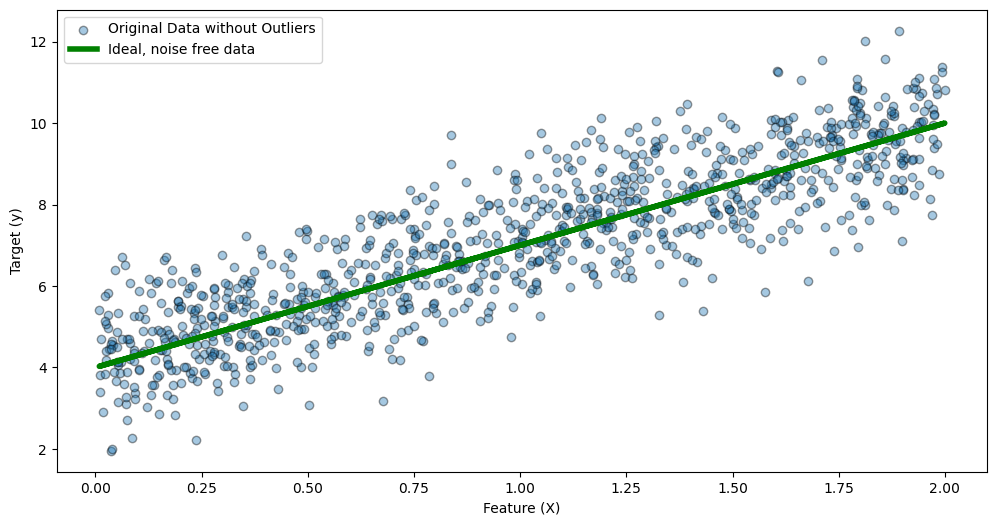

In [7]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data without Outliers')
plt.plot(X, y_ideal,  linewidth=4, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()


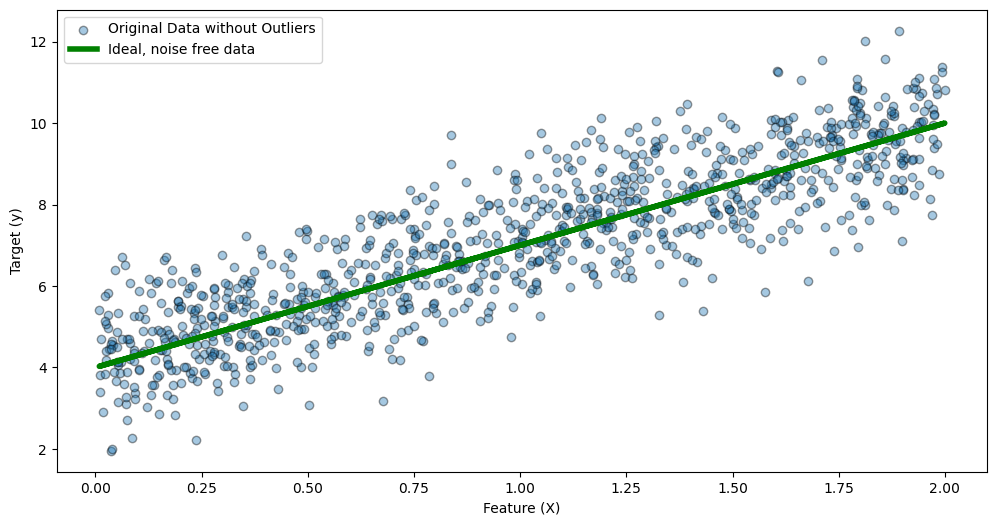

In [8]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data without Outliers')
plt.plot(X, y_ideal,  linewidth=4, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

In [9]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=.2)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

In [10]:
regression_results(y, y_outlier_pred_lin, 'Ordinary')
regression_results(y, y_outlier_pred_ridge, 'Ridge')
regression_results(y, y_outlier_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.6748
r2:  0.6357
MAE:  0.9468
MSE:  1.4164
RMSE:  1.1901

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.6766
r2:  0.6375
MAE:  0.9443
MSE:  1.4094
RMSE:  1.1872

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7394
r2:  0.7003
MAE:  0.8597
MSE:  1.1651
RMSE:  1.0794



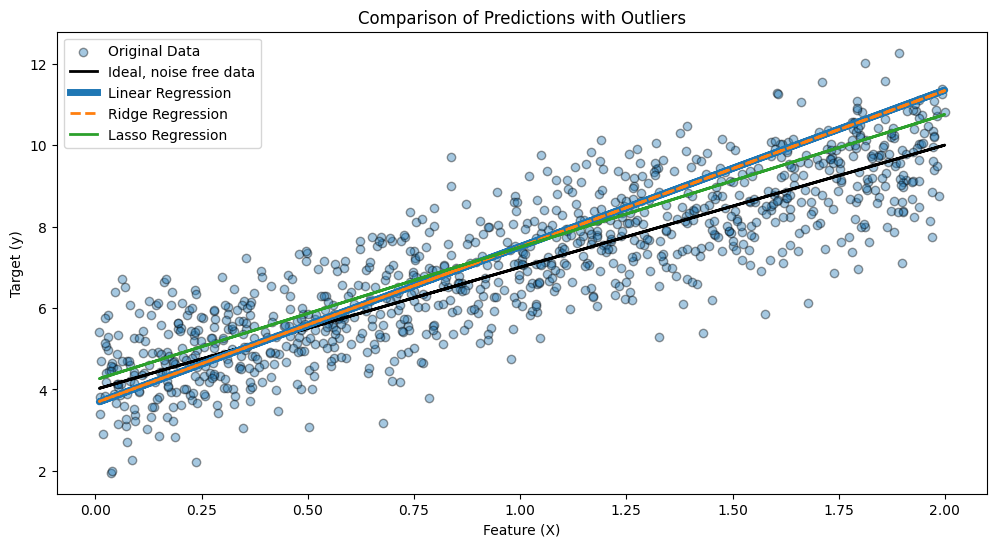

In [11]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_ridge, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.7492
r2:  0.7492
MAE:  0.7873
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.7492
r2:  0.7492
MAE:  0.7874
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7191
r2:  0.7191
MAE:  0.8408
MSE:  1.0923
RMSE:  1.0451



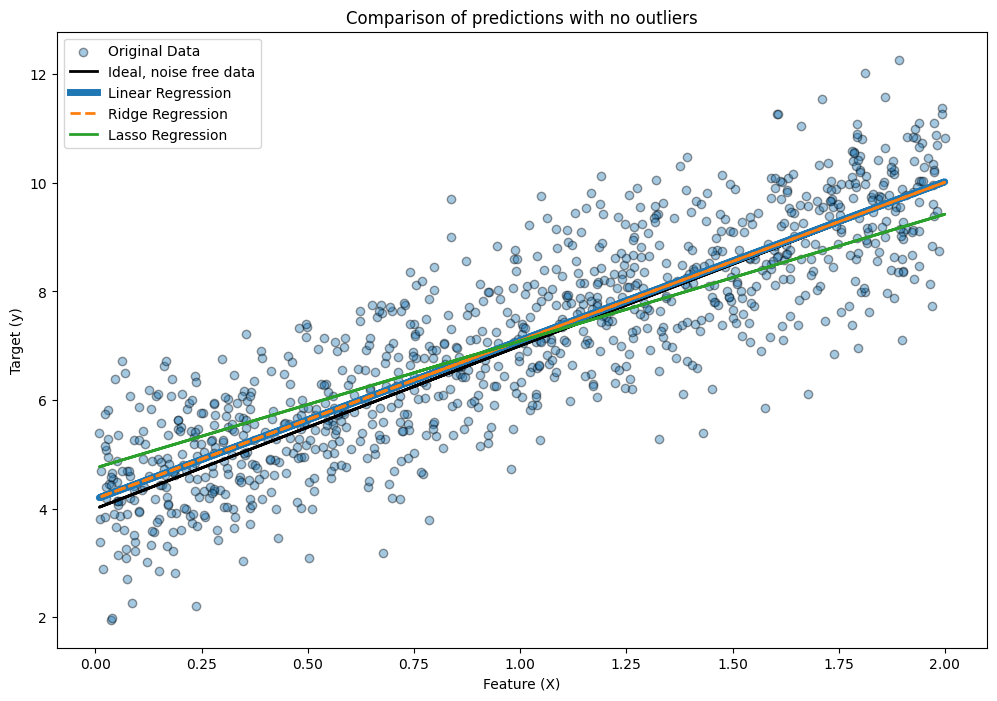

In [12]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression results
regression_results(y, y_pred_lin, 'Ordinary')
regression_results(y, y_pred_ridge, 'Ridge')
regression_results(y, y_pred_lasso, 'Lasso')


# Plot the data and the predictions
plt.figure(figsize=(12, 8))

# # Scatter plot of the original data
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle='--',linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
# plt.ylim((0,20))
plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()

<details><summary>Click here for the solution</summary>
    
```python
   
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression results
regression_results(y, y_pred_lin, 'Ordinary')
regression_results(y, y_pred_ridge, 'Ridge')
regression_results(y, y_pred_lasso, 'Lasso')


# Plot the data and the predictions
plt.figure(figsize=(12, 8))

# # Scatter plot of the original data
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle='--',linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
# plt.ylim((0,20))
plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()
```


In [13]:
from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(n_samples=100, n_features=100, n_informative=10, noise=10, random_state=42, coef=True)

# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_predictions = X @ ideal_coef

# Split the dataset into training and testing 

X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_predictions, test_size=0.3, random_state=42)

In [14]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [15]:
regression_results(y_test, y_pred_linear, 'Ordinary')
regression_results(y_test, y_pred_ridge, 'Ridge')
regression_results(y_test, y_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.4354
r2:  0.4018
MAE:  77.7353
MSE:  9844.2714
RMSE:  99.2183

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.4446
r2:  0.4079
MAE:  76.9622
MSE:  9744.4693
RMSE:  98.7141

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.9815
r2:  0.9815
MAE:  13.8855
MSE:  304.644
RMSE:  17.4541



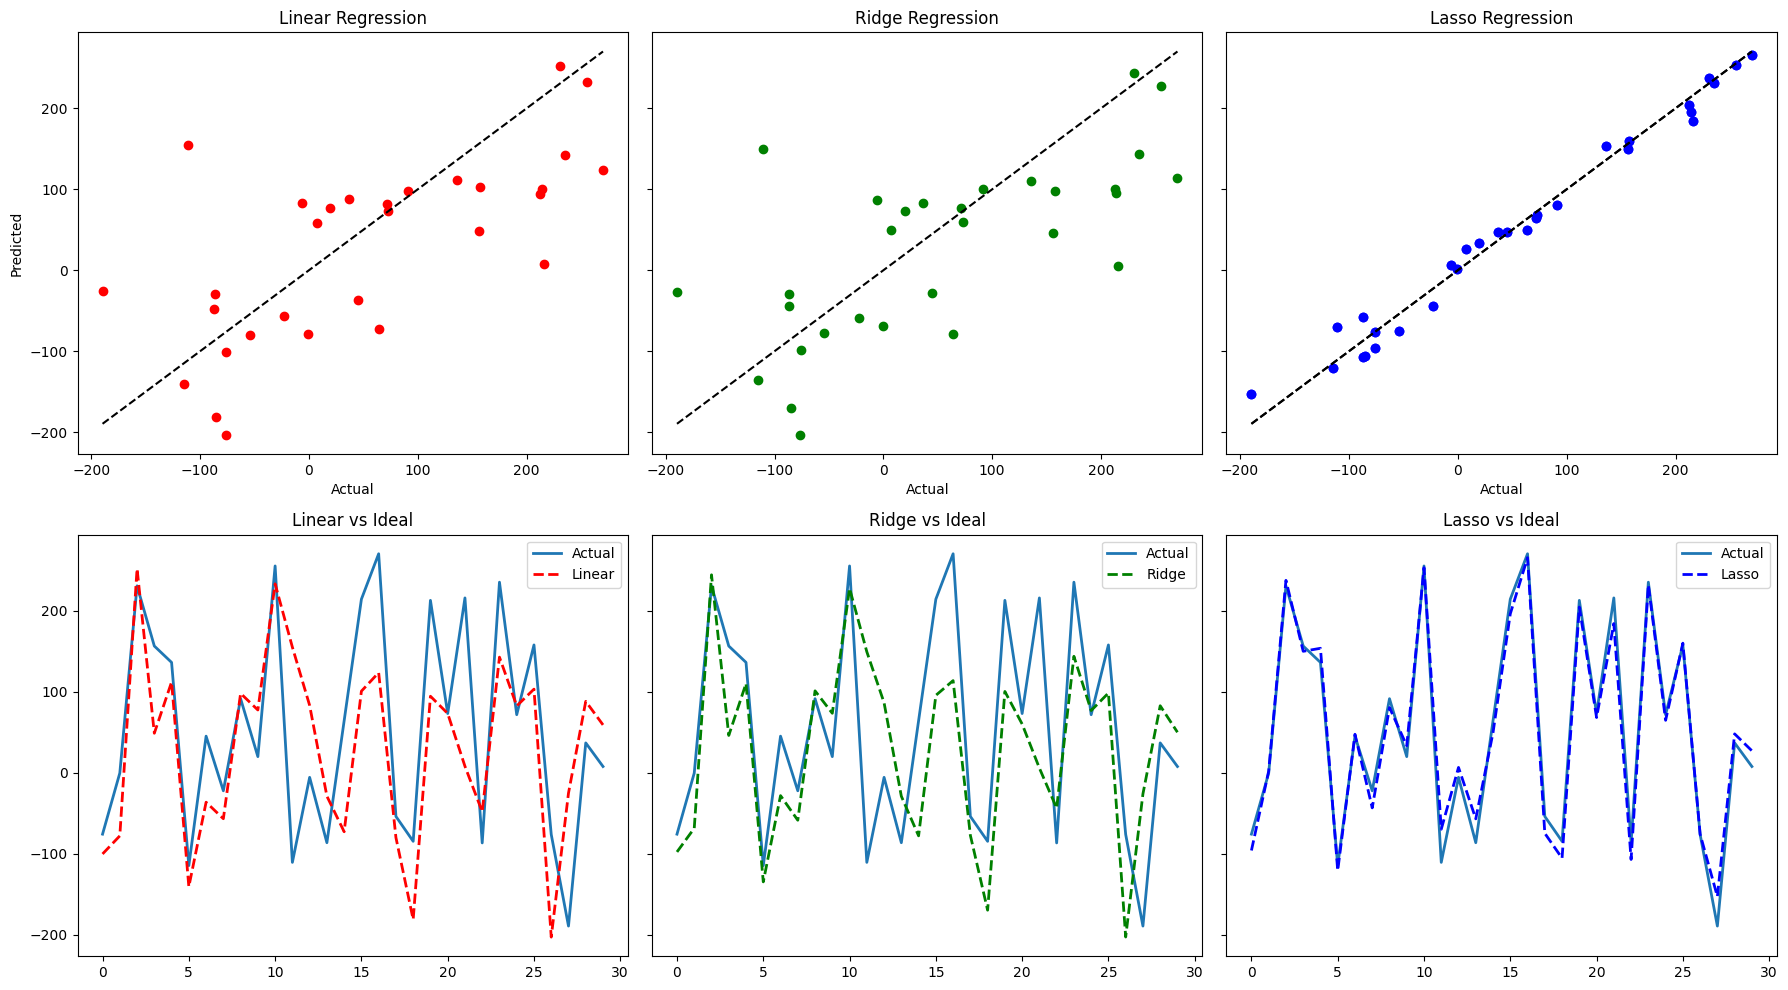

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression")
axes[0,0].set_xlabel("Actual",)
axes[0,0].set_ylabel("Predicted",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)


# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()
 
axes[1,1].plot(y_test, label="Actual", lw=2)
# axes[1,1].plot(ideal_test, '--', label="Ideal", lw=2, color="purple")
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()
 
axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()
 
plt.tight_layout()
plt.show()

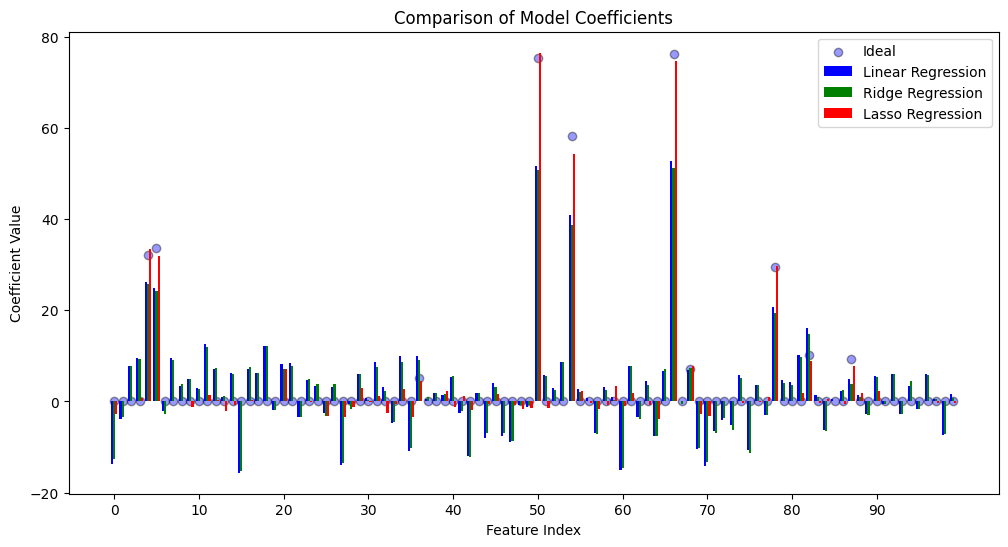

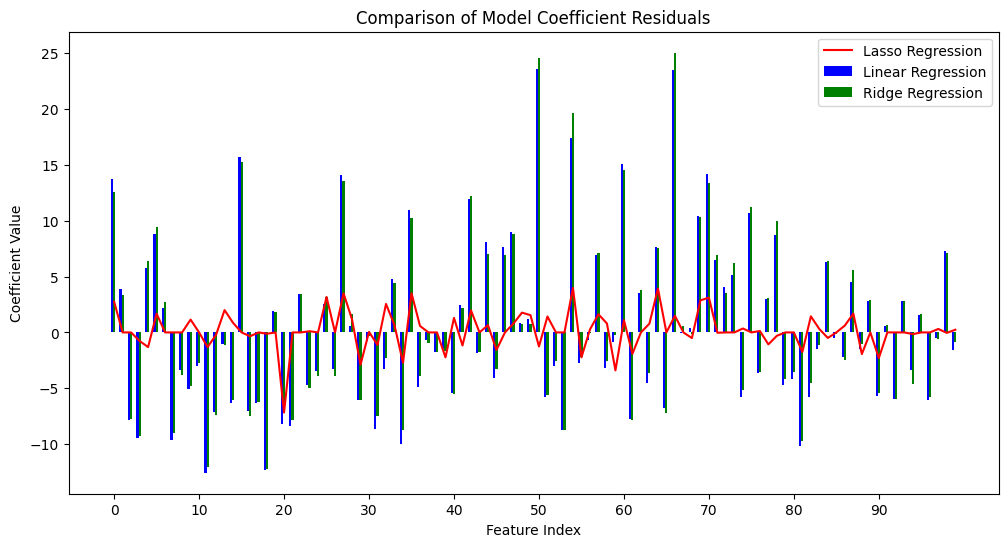

In [18]:
# Model coefficients
linear_coeff = linear.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_


# Plot the coefficients
x_axis = np.arange(len(linear_coeff))
x_labels = np.arange(min(x_axis),max(x_axis),10)
plt.figure(figsize=(12, 6))

plt.scatter(x_axis, ideal_coef,  label='Ideal', color='blue', ec='k', alpha=0.4)
plt.bar(x_axis - 0.25, linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ridge_coeff, width=0.25, label='Ridge Regression', color='green')
plt.bar(x_axis + 0.25, lasso_coeff, width=0.25, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(x_labels)
plt.legend()
plt.show()


# Plot the coefficient residuals
x_axis = np.arange(len(linear_coeff))

plt.figure(figsize=(12, 6))

plt.bar(x_axis - 0.25, ideal_coef - linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ideal_coef - ridge_coeff, width=0.25, label='Ridge Regression', color='green')
# plt.bar(x_axis + 0.25, ideal_coef - lasso_coeff, width=0.25, label='Lasso Regression', color='red')
plt.plot(x_axis, ideal_coef - lasso_coeff, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficient Residuals')
plt.xticks(x_labels)
plt.legend()
plt.show()

In [19]:
threshold = 5 # selected by inspection of residuals plot

# Create a dataframe containing the Lasso model and ideal coefficients
feature_importance_df = pd.DataFrame({
    'Lasso Coefficient': lasso_coeff,
    'Ideal Coefficient': ideal_coef
})

# Mark the selected features
feature_importance_df['Feature Selected'] = feature_importance_df['Lasso Coefficient'].abs() > threshold


print("Features Identified as Important by Lasso:")
display(feature_importance_df[feature_importance_df['Feature Selected']])

print("\nNonzero Ideal Coefficient Indices")
display(feature_importance_df[feature_importance_df['Ideal Coefficient']>0])



Features Identified as Important by Lasso:


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
20,7.163636,0.000000,True
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True



Nonzero Ideal Coefficient Indices


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
36,4.588118,5.166218,False
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


In [21]:
important_features = feature_importance_df[feature_importance_df['Feature Selected']].index

In [22]:
# Filter features
X_filtered = X[:, important_features]
print("Shape of the filtered feature set:", X_filtered.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X_filtered, y, ideal_predictions, test_size=0.3, random_state=42)

Shape of the filtered feature set: (100, 10)


In [23]:
# Initialize the models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [24]:
regression_results(y_test, y_pred_linear, 'Ordinary')
regression_results(y_test, y_pred_ridge, 'Ridge')
regression_results(y_test, y_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.9917
r2:  0.9915
MAE:  9.653
MSE:  139.4874
RMSE:  11.8105

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.9909
r2:  0.9905
MAE:  10.1418
MSE:  156.9035
RMSE:  12.5261

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.9917
r2:  0.9914
MAE:  9.6928
MSE:  140.803
RMSE:  11.866



<details><summary>Click here for the solution</summary>


```python
regression_results(y_test, y_pred_linear, 'Ordinary')
regression_results(y_test, y_pred_ridge, 'Ridge')
regression_results(y_test, y_pred_lasso, 'Lasso')



```


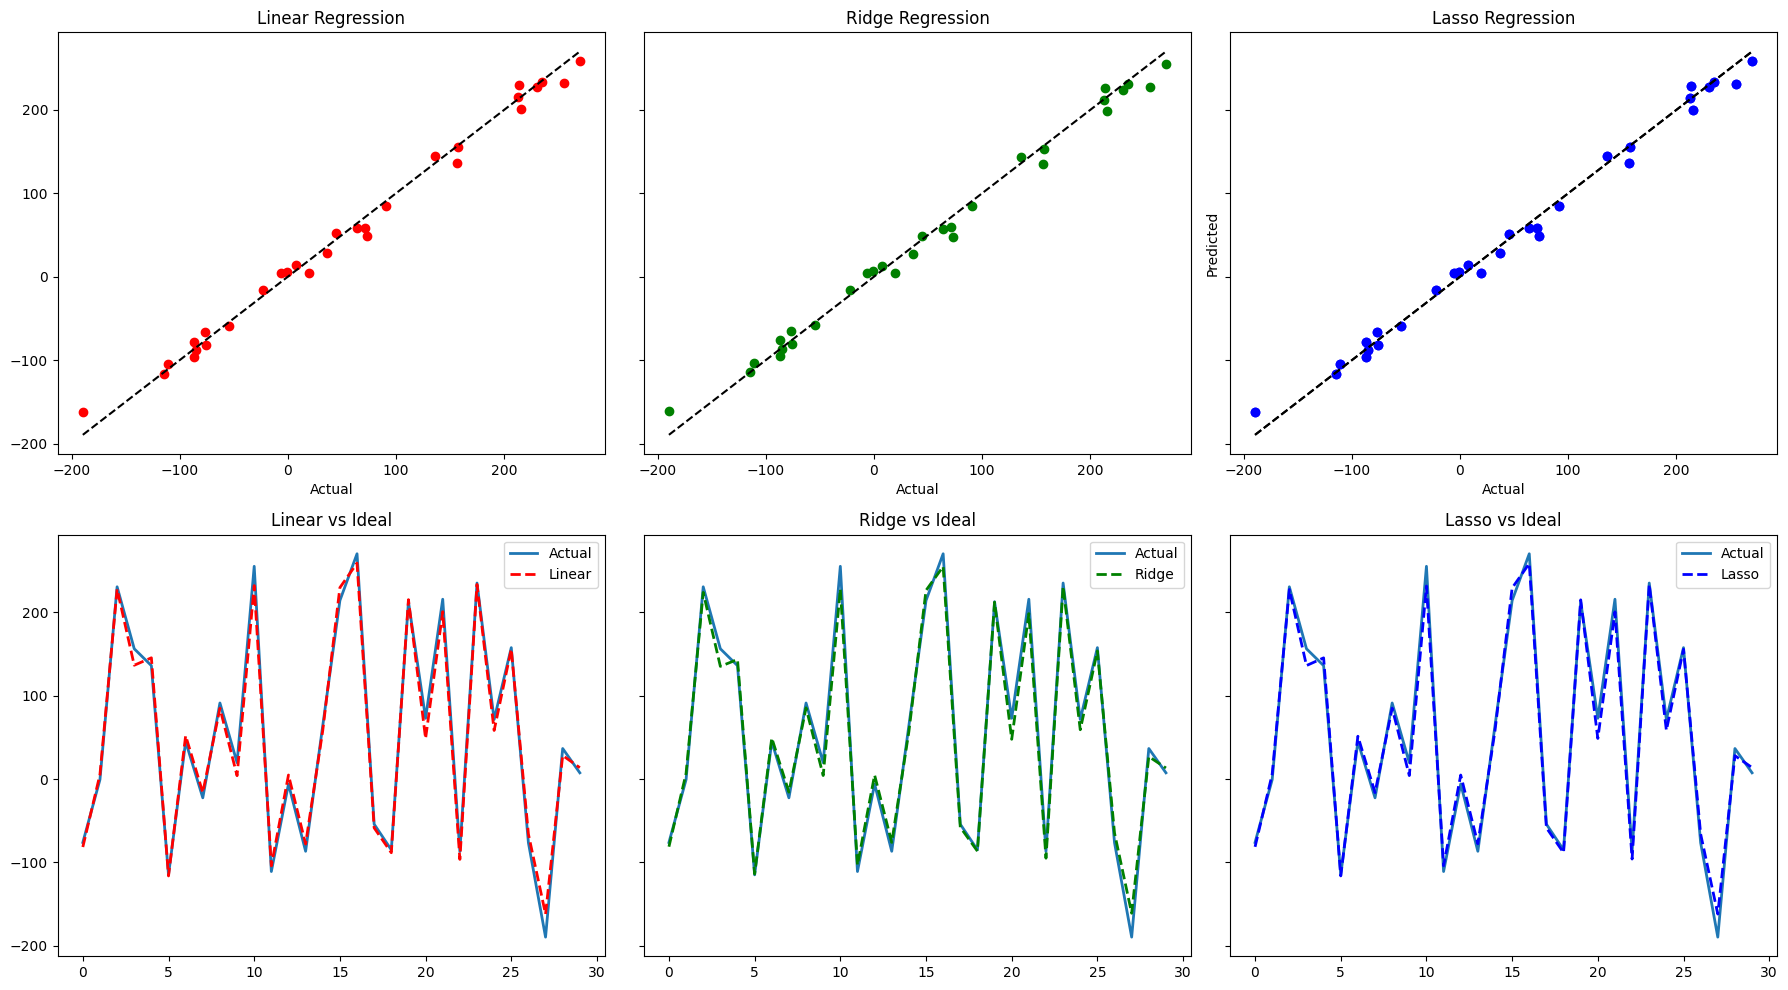

In [25]:
# Plot the predictions vs actuals 
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression",)
axes[0,0].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()
 
axes[1,1].plot(y_test, label="Actual", lw=2)
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()
 
axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()

